In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import time
import random
#plot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls
#from matplotlib.axes import Axes
from scipy.spatial import distance
import re

In [2]:
X_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_x_resample3000_boundarysel_50pergroup.csv")
y_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_y_resample3000_boundarysel_50pergroup.csv")
X_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\scaled_validation_feature.csv")
y_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\validation_label.csv")
X_train = X_train.drop(["predict_cluster"],axis=1)
y_train = y_train.drop(["predict_cluster"],axis=1)
X_val = X_val.drop(["Unnamed: 0"],axis=1)
y_val = y_val.drop(["Unnamed: 0"],axis=1)

In [3]:
len(X_train)

248452

In [91]:
#IMPORT CNN
X_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_x_resample3000_CNN.csv")
y_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_y_resample3000_CNN.csv")
X_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\scaled_validation_feature.csv")
y_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\validation_label.csv")
X_val = X_val.drop(["Unnamed: 0"],axis=1)
y_val = y_val.drop(["Unnamed: 0"],axis=1)

In [112]:
X_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_x_resample3000_boundarysel_20pergroup.csv")
y_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_y_resample3000_boundarysel_20pergroup.csv")
X_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\scaled_validation_feature.csv")
y_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\validation_label.csv")
X_train = X_train.drop(["predict_cluster"],axis=1)
y_train = y_train.drop(["predict_cluster"],axis=1)
X_val = X_val.drop(["Unnamed: 0"],axis=1)
y_val = y_val.drop(["Unnamed: 0"],axis=1)

In [5]:
#X_val = X_val.drop(["sourceofpixel"],axis=1)
#y_val = y_val.drop(["sourceofpixel"],axis=1)
#y_train = y_train.drop(["sourceofpixel"],axis=1)
#y_val = y_val.drop(["indexofpixel"],axis=1)
#y_train = y_train.drop(["indexofpixel"],axis=1)

In [80]:
def cal_score (y_pred,y_val):
    n11 = 0
    n12 = 0
    n21 = 0
    n22 = 0
    y_pred_array= np.array(y_pred)
    y_val_array= np.array(y_val)
    for j in range(len(y_pred_array)):
        if (y_pred_array[j]==2)&(y_val_array[j]==2):
            n22 = n22+1
        elif (y_pred_array[j]==1)&(y_val_array[j]==2):
            n12 = n12 +1
        elif (y_pred_array[j]==2)&(y_val_array[j]==1):
            n21 = n21+1
        else:
            n11 = n11+1 
    try:       
        Precall = n22 / ( n12 + n22)
        Pprecision = n22 / ( n21 + n22)
        f1_score = 2 / (1/Precall + 1/Pprecision)
        FPR = n21/(n21 + n11)
        FNR = n12/(n12 +n22 )
        BER = 1/2*(FPR+FNR)
        print ("n11:.."+str(n11)+"..n12:.."+str(n12)+"..n21:.."+str(n21)+"..n22:.."+str(n22))
        print ("TPR:"+str(Precall))
        print ("f1 score:" + str(f1_score))
        print ("FPR:"+ str(FPR))
        print ("BER:" + str(BER))
        return Precall,f1_score,BER,FPR
    except Exception as ex:
        print ("divided by zero, just skip")
        return 0,0,0,0

This part is the original dataset, outlier detection: resampling 3000 and boundary selection 50 per
group

In [113]:
def nn_parameter(X_val,X_train,y_train):
    class_1=X_train[y_train['label']==1]
    class_2=X_train[y_train['label']==2]
    print(class_1.shape)
    print(class_2.shape)
    mean_1=np.array(class_1.mean()).reshape(1,-1)
    mean_2=np.array(class_2.mean()).reshape(1,-1)
    print(mean_2.shape)
    cov_1=np.matrix(class_1.cov())
    cov_2=np.matrix(class_2.cov())
    dis_1=distance.cdist(X_val,mean_1,metric='mahalanobis',V=cov_1).ravel()
    dis_2=distance.cdist(X_val,mean_2,metric='mahalanobis',V=cov_2).ravel()
    return dis_1, dis_2

In [114]:
dis_1, dis_2 =nn_parameter(X_val,X_train,y_train)

(142576, 5)
(49203, 5)
(1, 5)


In [94]:
dis_2.shape

(70027,)

In [95]:
#Nearest Mean algorithm
def nn_predict(dis_1,dis_2,alpha):
    y_pred=[]
    for index in range(len(X_val)):
        if (alpha)*dis_1[index]<(1-alpha)*dis_2[index]:
                y_pred.append(np.float64(1.0)) 
        else:
                y_pred.append(np.float64(2.0))
    y_pred=pd.Series(y_pred)
    return y_pred

In [115]:
y_pred=nn_predict(dis_1,dis_2,0.517)

In [116]:
y_pred = {"label_pred":y_pred}
y_pred = pd.DataFrame(data=y_pred)

In [117]:
Precall,f1_score,BER,FP = cal_score (y_pred,y_val['label']) 

n11:..51421..n12:..2260..n21:..9786..n22:..6560
TPR:0.7437641723356009
f1 score:0.5213383135977112
FPR:0.1598836734360449
BER:0.20805975055022202


In [99]:
def parameter_adjust (dis_1,dis_2):
    alpha = 0.10
    alpha_list = []
    tp_list = []
    fp_list = []
    BER_list = []
    f1_score_list = []
    while(alpha<=0.9):
        print ("current alpha:"+str(alpha))
        y_pred_temp=nn_predict(dis_1,dis_2,alpha)
        Precall,f1_score,BER,FPR = cal_score (y_pred_temp,y_val['label'])
        alpha_list.append(alpha)
        tp_list.append(Precall)
        fp_list.append(FPR)
        BER_list.append(BER)
        f1_score_list.append(f1_score)
        if (0.4<=alpha<=0.6):
            alpha=alpha+0.01
        else:
            alpha=alpha+0.1
        print("                 ")
    return tp_list, fp_list, BER_list, f1_score_list,alpha_list

#this part boundary selection 50 points per group

In [86]:
tpr_list_50pergroup,fpr_list_50pergroup,BER_list_50pergroup, f1_score_list_50pergroup,alpha_list = parameter_adjust (dis_1,dis_2)

current alpha:0.1
divided by zero, just skip
                 
current alpha:0.2
divided by zero, just skip
                 
current alpha:0.30000000000000004
n11:..61156..n12:..8788..n21:..51..n22:..32
TPR:0.0036281179138321997
f1 score:0.00718858811636527
FPR:0.000833238028330093
BER:0.49860256005724896
                 
current alpha:0.4
n11:..58370..n12:..6899..n21:..2837..n22:..1921
TPR:0.21780045351473923
f1 score:0.2829577257328031
FPR:0.046350907575930855
BER:0.4142752270305958
                 
current alpha:0.41000000000000003
n11:..57935..n12:..6574..n21:..3272..n22:..2246
TPR:0.2546485260770975
f1 score:0.3132933463523504
FPR:0.053457937817569884
BER:0.3994047058702362
                 
current alpha:0.42000000000000004
n11:..57535..n12:..6267..n21:..3672..n22:..2553
TPR:0.2894557823129252
f1 score:0.33938185443668994
FPR:0.05999313803976669
BER:0.3852686778634208
                 
current alpha:0.43000000000000005
n11:..57155..n12:..5951..n21:..4052..n22:..2869
TPR:0.3252

In [101]:
boundarysel_50persummary = {'Alpha':alpha_list,'tpr':tpr_list_50pergroup,'fpr':fpr_list_50pergroup,'BER':BER_list_50pergroup,'f1_score':f1_score_list_50pergroup}
boundarysel_50persummary = pd.DataFrame(data=boundarysel_50persummary)

In [88]:
boundarysel_50persummary

,Alpha,BER,f1_score,fpr,tpr
0,0.10,0.000000,0.000000,0.000000,0.000000
1,0.20,0.000000,0.000000,0.000000,0.000000
2,0.30,0.498603,0.007189,0.000833,0.003628
3,0.40,0.414275,0.282958,0.046351,0.217800
4,0.41,0.399405,0.313293,0.053458,0.254649
5,0.42,0.385269,0.339382,0.059993,0.289456
6,0.43,0.370459,0.364526,0.066202,0.325283
7,0.44,0.355928,0.386674,0.073080,0.361224
8,0.45,0.337953,0.412726,0.079648,0.403741
9,0.46,0.319273,0.436512,0.087751,0.449206


In [89]:
#function plot the ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [ ]:
#alpha: 0.4:0.1:0.7  find the best result between [0.50,0.54]

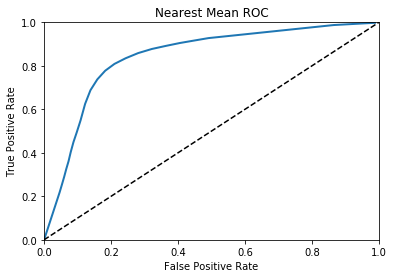

In [90]:
plt.title("Nearest Mean ROC")
plot_roc_curve(fpr_list_50pergroup,tpr_list_50pergroup,label='Nearest Mean')
plt.show()

In [100]:
tpr_list_CNN,fpr_list_CNN,BER_list_CNN, f1_score_list_CNN,alpha_list = parameter_adjust (dis_1,dis_2)

current alpha:0.1
divided by zero, just skip
                 
current alpha:0.2
divided by zero, just skip
                 
current alpha:0.30000000000000004
n11:..61189..n12:..8795..n21:..18..n22:..25
TPR:0.002834467120181406
f1 score:0.005641430666817104
FPR:0.00029408400999885636
BER:0.4987298084449087
                 
current alpha:0.4
n11:..59066..n12:..7171..n21:..2141..n22:..1649
TPR:0.18696145124716554
f1 score:0.26153846153846155
FPR:0.03497965918930841
BER:0.42400910397107144
                 
current alpha:0.41000000000000003
n11:..58806..n12:..6949..n21:..2401..n22:..1871
TPR:0.21213151927437643
f1 score:0.2858234036052551
FPR:0.039227539333736336
BER:0.41354801002967995
                 
current alpha:0.42000000000000004
n11:..58530..n12:..6703..n21:..2677..n22:..2117
TPR:0.24002267573696145
f1 score:0.3110033788746878
FPR:0.043736827487052134
BER:0.4018570758750453
                 
current alpha:0.43000000000000005
n11:..58235..n12:..6491..n21:..2972..n22:..2329
TPR:0

In [102]:
CNN_summary = {'Alpha':alpha_list,'tpr':tpr_list_CNN,'fpr':fpr_list_CNN,'BER':BER_list_CNN,'f1_score':f1_score_list_CNN}
CNN_summary = pd.DataFrame(data=CNN_summary)

In [103]:
CNN_summary

,Alpha,BER,f1_score,fpr,tpr
0,0.10,0.000000,0.000000,0.000000,0.000000
1,0.20,0.000000,0.000000,0.000000,0.000000
2,0.30,0.498730,0.005641,0.000294,0.002834
3,0.40,0.424009,0.261538,0.034980,0.186961
4,0.41,0.413548,0.285823,0.039228,0.212132
5,0.42,0.401857,0.311003,0.043737,0.240023
6,0.43,0.392249,0.329863,0.048557,0.264059
7,0.44,0.380553,0.351396,0.053736,0.292630
8,0.45,0.368224,0.372584,0.058784,0.322336
9,0.46,0.351952,0.399321,0.063767,0.359864


In [ ]:
plt.title("Nearest Mean ROC")
plot_roc_curve(fpr_list_50pergroup,tpr_list_50pergroup,label='Boundary_selection')
plot_roc_curve(fpr_list_CNN,tpr_list_CNN,label='CNN')
plt.show()

In [104]:
#function plot the ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

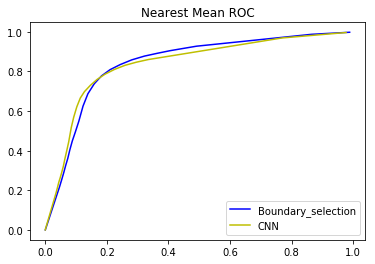

In [111]:
plt.title("Nearest Mean ROC")
plt.plot(fpr_list_50pergroup,tpr_list_50pergroup,"b-",label='Boundary_selection')
plt.plot(fpr_list_CNN,tpr_list_CNN,"y-",label='CNN')
plt.legend()
plt.show()

In [ ]:
#boundary selection 20 per group

In [118]:
tpr_list_20pergroup,fpr_list_20pergroup,BER_list_20pergroup, f1_score_list_20pergroup,alpha_list = parameter_adjust (dis_1,dis_2)

current alpha:0.1
divided by zero, just skip
                 
current alpha:0.2
divided by zero, just skip
                 
current alpha:0.30000000000000004
n11:..61182..n12:..8803..n21:..25..n22:..17
TPR:0.001927437641723356
f1 score:0.003836605732340329
FPR:0.00040845001388730047
BER:0.499240506186082
                 
current alpha:0.4
n11:..58940..n12:..7298..n21:..2267..n22:..1522
TPR:0.17256235827664398
f1 score:0.24141486239987311
FPR:0.037038247259300404
BER:0.4322379444913282
                 
current alpha:0.41000000000000003
n11:..58533..n12:..6986..n21:..2674..n22:..1834
TPR:0.20793650793650795
f1 score:0.27521008403361347
FPR:0.04368781348538566
BER:0.41787565277443883
                 
current alpha:0.42000000000000004
n11:..58136..n12:..6647..n21:..3071..n22:..2173
TPR:0.2463718820861678
f1 score:0.30901592718998866
FPR:0.05017399970591599
BER:0.4019010588098741
                 
current alpha:0.43000000000000005
n11:..57722..n12:..6332..n21:..3485..n22:..2488
TPR:0.2

In [119]:
boundarysel_20persummary = {'Alpha':alpha_list,'tpr':tpr_list_20pergroup,'fpr':fpr_list_20pergroup,'BER':BER_list_20pergroup,'f1_score':f1_score_list_20pergroup}
boundarysel_20persummary = pd.DataFrame(data=boundarysel_20persummary)

In [120]:
boundarysel_20persummary

,Alpha,BER,f1_score,fpr,tpr
0,0.10,0.000000,0.000000,0.000000,0.000000
1,0.20,0.000000,0.000000,0.000000,0.000000
2,0.30,0.499241,0.003837,0.000408,0.001927
3,0.40,0.432238,0.241415,0.037038,0.172562
4,0.41,0.417876,0.275210,0.043688,0.207937
5,0.42,0.401901,0.309016,0.050174,0.246372
6,0.43,0.387426,0.336375,0.056938,0.282086
7,0.44,0.371923,0.362970,0.063914,0.320068
8,0.45,0.356315,0.387322,0.070793,0.358163
9,0.46,0.336407,0.416308,0.078030,0.405215


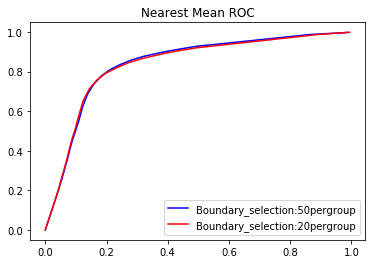

In [123]:
plt.title("Nearest Mean ROC")
plt.plot(fpr_list_50pergroup,tpr_list_50pergroup,"b-",label='Boundary_selection:50pergroup')
plt.plot(fpr_list_20pergroup,tpr_list_20pergroup,"r-",label='Boundary_selection:20pergroup')
#plt.plot(fpr_list_CNN,tpr_list_CNN,"y-",label='CNN')
plt.legend()
plt.show()

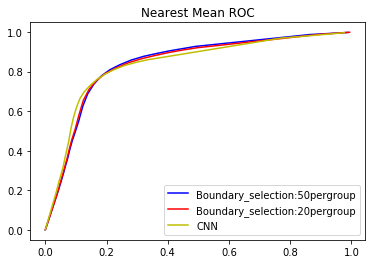

In [124]:

plt.title("Nearest Mean ROC")
plt.plot(fpr_list_50pergroup,tpr_list_50pergroup,"b-",label='Boundary_selection:50pergroup')
plt.plot(fpr_list_20pergroup,tpr_list_20pergroup,"r-",label='Boundary_selection:20pergroup')
plt.plot(fpr_list_CNN,tpr_list_CNN,"y-",label='CNN')
plt.legend()
plt.show()

In [49]:
dataset = loadmat ("D:\\lab; signal processing\\forStudents\\medData\\dataset.mat",mat_dtype=True)
data=dataset["dataset"]

In [115]:
selected_matrix=y_val[y_val['sourceofpixel']==11]
selected_matrix=pd.DataFrame.reset_index(selected_matrix).drop('index',axis=1)
print (selected_matrix)

        indexofpixel  label  sourceofpixel
0      [183 134  16]    1.0             11
1      [184 134  16]    1.0             11
2      [178 135  16]    1.0             11
3      [179 135  16]    1.0             11
4      [180 135  16]    1.0             11
5      [181 135  16]    1.0             11
6      [182 135  16]    1.0             11
7      [183 135  16]    1.0             11
8      [184 135  16]    1.0             11
9      [185 135  16]    1.0             11
10     [186 135  16]    1.0             11
11     [187 135  16]    1.0             11
12     [174 136  16]    1.0             11
13     [175 136  16]    1.0             11
14     [176 136  16]    1.0             11
15     [177 136  16]    1.0             11
16     [178 136  16]    1.0             11
17     [179 136  16]    1.0             11
18     [180 136  16]    1.0             11
19     [181 136  16]    1.0             11
20     [182 136  16]    1.0             11
21     [183 136  16]    1.0             11
22     [184

In [48]:
selected_matrix = y_val[y_val['sourceofpixel']==11]
temp_label = y_pred[y_val['sourceofpixel']==1]
cancer_x = []
cancer_y = []
noncancer_x = []
noncancer_y = []
for i in range(len(selected_matrix)):
        temparr = re.findall("\d+",selected_matrix.iloc[i]['indexofpixel'])
        if (int(temparr[2]) == slices):
            if (temp_label.iloc[i]['label']==1):
                noncancer_x.append(int(temparr[0]))
                noncancer_y.append(int(temparr[1]))
            else:
                cancer_x.append(int(temparr[0]))
                cancer_y.append(int(temparr[1]))
plt.scatter(cancer_y,cancer_x, s = 3)
plt.scatter(noncancer_y,noncancer_x, s = 3)
    

0        [183 134  16]
1        [184 134  16]
2        [178 135  16]
3        [179 135  16]
4        [180 135  16]
5        [181 135  16]
6        [182 135  16]
7        [183 135  16]
8        [184 135  16]
9        [185 135  16]
10       [186 135  16]
11       [187 135  16]
12       [174 136  16]
13       [175 136  16]
14       [176 136  16]
15       [177 136  16]
16       [178 136  16]
17       [179 136  16]
18       [180 136  16]
19       [181 136  16]
20       [182 136  16]
21       [183 136  16]
22       [184 136  16]
23       [185 136  16]
24       [186 136  16]
25       [187 136  16]
26       [188 136  16]
27       [189 136  16]
28       [130 137  16]
29       [131 137  16]
             ...      
30626    [164 187  23]
30627    [165 187  23]
30628    [166 187  23]
30629    [167 187  23]
30630    [168 187  23]
30631    [169 187  23]
30632    [170 187  23]
30633    [152 188  23]
30634    [153 188  23]
30635    [154 188  23]
30636    [155 188  23]
30637    [156 188  23]
30638    [1

In [129]:
def plot_prediction(stuck,slices,features,y_val,y_pred):
    plt.subplot(121)
    plt.title("original label")
    target_data=data[stuck][0][0][0][0][:,:,slices,features]
    target_image1=target_data.reshape(target_data.shape[0],target_data.shape[1])
    target_label=data[stuck][0][0][0][3][:,:,slices]
    target_image2=target_label.reshape(target_label.shape[0],target_label.shape[1])
    cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list('my_cmap',['black','green','red'],256)
    plt.imshow(target_image1,cmap = matplotlib.cm.binary,alpha=0.8)
    plt.imshow(target_image2,cmap = cmap1,interpolation="bilinear",alpha=0.2)
    plt.axis("off") #close the axis numbertarget_data=data[stuck][0][0][0][0][:,:,slices,features]
    target_image=target_data.reshape(target_data.shape[0],target_data.shape[1])
    plt.show()
    
    selected_matrix=y_val[y_val['sourceofpixel']==stuck]
    selected_matrix=pd.DataFrame.reset_index(selected_matrix).drop('index',axis=1)
    temp_label = y_pred[y_val['sourceofpixel']==stuck]
    temp_label =pd.DataFrame.reset_index(temp_label ).drop('index',axis=1)
    cancer_x = []
    cancer_y = []
    noncancer_x = []
    noncancer_y = []
    for i in range(len(selected_matrix)):
            temparr = re.findall("\d+",selected_matrix.iloc[i]['indexofpixel'])
            if (int(temparr[2]) == slices):
                if (temp_label.iloc[i]['label_pred']==2):
                    cancer_x.append(int(temparr[0]))
                    cancer_y.append(int(temparr[1]))
                else:
                    noncancer_x.append(int(temparr[0]))
                    noncancer_y.append(int(temparr[1]))
    plt.subplot(122)
    plt.title("prediction with NN")
    plt.imshow(target_image1,cmap = matplotlib.cm.binary,alpha=0.8)
    plt.scatter(noncancer_y,noncancer_x, s = 3)
    plt.scatter(cancer_y,cancer_x, s = 3)
    plt.show()

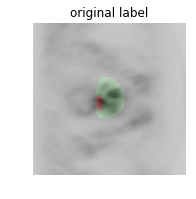

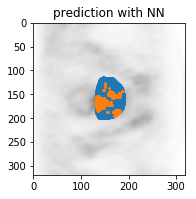

In [131]:
plot_prediction (11,22,3,y_val,y_pred)

In [125]:
boundarysel_20persummary.to_csv("D:\\lab; signal processing\\forStudents\\medData\\result\\NN_boundarysel_20persummary.csv",index=True)
boundarysel_50persummary.to_csv("D:\\lab; signal processing\\forStudents\\medData\\result\\NN_boundarysel_50persummary.csv",index=True)
CNN_summary.to_csv("D:\\lab; signal processing\\forStudents\\medData\\result\\NN_CNN_summary.csv",index=True)